In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks', {'font.sans-serif': ['DejaVu Sans']})

In [2]:
# download these from Github too
chignolin_membs = np.load('chignolin_scorelag100ns_metastable_memberships.npy')

villin_membs = np.load('villin_scorelag100ns_metastable_memberships.npy')
villin_misfold = np.load('villin_misfold_scorelag100ns.npy')

trpcage_membs = np.load('trpcage_scorelag100ns_metastable_memberships.npy')

ntl9_membs = np.load('ntl9_scorelag100ns_metastable_memberships.npy')

In [3]:
# chignolin 200 microstates, villin 50, trpcage and NTL9 100

In [4]:
# get sets

In [5]:
# returns [[folded], [unfolded], [intermediate]]
def get_sets(cutoff):
    chignolin_sets = [np.concatenate(np.argwhere(chignolin_membs[:,1] >= cutoff)),
    np.concatenate(np.argwhere(chignolin_membs[:,0] >= cutoff)), []]
    
    for i in range(200):
        if i not in chignolin_sets[0] and i not in chignolin_sets[1]:
            chignolin_sets[2].append(i)
    
    villin_sets = [np.concatenate(np.argwhere(villin_membs[:,1] >= cutoff)),
    np.concatenate(np.argwhere(villin_membs[:,2] >= cutoff)), []]
    
    for i in range(50):
        if i not in villin_sets[0] and i not in villin_sets[1] and i not in villin_misfold:
            villin_sets[2].append(i)

    trpcage_sets = [np.concatenate(np.argwhere(trpcage_membs[:,0] >= cutoff)),
    np.concatenate(np.argwhere(trpcage_membs[:,1] >= cutoff)), []]
    
    for i in range(100):
        if i not in trpcage_sets[0] and i not in trpcage_sets[1]:
            trpcage_sets[2].append(i)

    ntl9_sets = [np.concatenate(np.argwhere(ntl9_membs[:,1] >= cutoff)),
    np.concatenate(np.argwhere(ntl9_membs[:,0] >= cutoff)), []]
    
    for i in range(100):
        if i not in ntl9_sets[0] and i not in ntl9_sets[1]:
            ntl9_sets[2].append(i)
    
    return (chignolin_sets, villin_sets, trpcage_sets, ntl9_sets)

In [6]:
cutoff = 0.8

sets = get_sets(cutoff)

len(sets[0][2]), len(sets[1][2]), len(sets[2][2]), len(sets[3][2])

(10, 9, 2, 9)

In [7]:
sets[0][2] # chignolin intermediate

[23, 29, 38, 57, 75, 89, 93, 151, 159, 169]

In [8]:
cutoff = 0.85

sets = get_sets(cutoff)

len(sets[0][2]), len(sets[1][2]), len(sets[2][2]), len(sets[3][2])

(16, 17, 4, 10)

In [9]:
cutoff = 0.9

sets = get_sets(cutoff)

len(sets[0][2]), len(sets[1][2]), len(sets[2][2]), len(sets[3][2])

(65, 35, 6, 12)

In [10]:
cutoff = 0.95

sets = get_sets(cutoff)

len(sets[0][2]), len(sets[1][2]), len(sets[2][2]), len(sets[3][2])

(143, 40, 7, 47)

In [11]:
cutoff = 0.99

sets = get_sets(cutoff)

len(sets[0][2]), len(sets[1][2]), len(sets[2][2]), len(sets[3][2])

(178, 43, 80, 93)

In [12]:
cutoff = 0.997

sets = get_sets(cutoff)

len(sets[0][2]), len(sets[1][2]), len(sets[2][2]), len(sets[3][2])

(193, 43, 95, 96)

In [13]:
#######################

In [14]:
# make cutoff vs. no. of intermediate states plots

In [15]:
def intermediate_size(cutoff):
    chignolin_new_len = [len(np.argwhere(chignolin_membs[:,1] >= cutoff)),
    len(np.argwhere(chignolin_membs[:,0] >= cutoff))]

    villin_new_len = [len(np.argwhere(villin_membs[:,1] >= cutoff)),
    len(np.argwhere(villin_membs[:,2] >= cutoff))]

    trpcage_new_len = [len(np.argwhere(trpcage_membs[:,0] >= cutoff)),
    len(np.argwhere(trpcage_membs[:,1] >= cutoff))]

    ntl9_new_len = [len(np.argwhere(ntl9_membs[:,1] >= cutoff)),
    len(np.argwhere(ntl9_membs[:,0] >= cutoff))]

    return (200-np.sum(chignolin_new_len), 45-np.sum(villin_new_len), 100-np.sum(trpcage_new_len), 100-np.sum(ntl9_new_len))

In [16]:
intermediate_sizes = []

for cutoff in list(np.arange(0.8,1,0.001))+[0.999999]:
    intermediate_sizes.append(intermediate_size(cutoff))

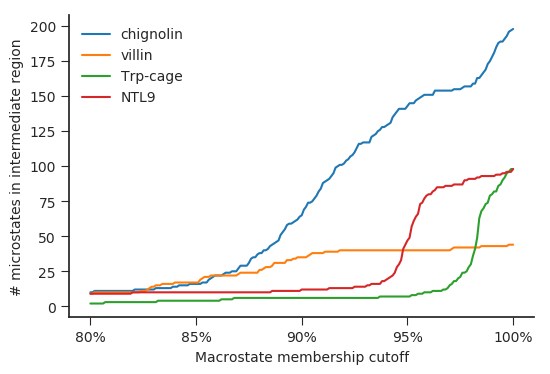

In [17]:
plt.figure(dpi=100)

plt.plot(np.array(intermediate_sizes)[:,0], label='chignolin')
plt.plot(np.array(intermediate_sizes)[:,1], label='villin')
plt.plot(np.array(intermediate_sizes)[:,2], label='Trp-cage')
plt.plot(np.array(intermediate_sizes)[:,3], label='NTL9')

plt.legend()
sns.despine()
plt.xlabel('Macrostate membership cutoff')
plt.xticks([0,50,100,150,200], ['80%', '85%', '90%', '95%', '100%'])
plt.ylabel('# microstates in intermediate region')
plt.show()

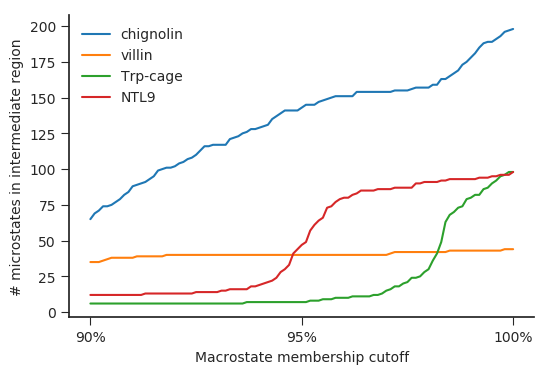

In [18]:
plt.figure(dpi=100)

plt.plot(np.array(intermediate_sizes)[100:,0], label='chignolin')
plt.plot(np.array(intermediate_sizes)[100:,1], label='villin')
plt.plot(np.array(intermediate_sizes)[100:,2], label='Trp-cage')
plt.plot(np.array(intermediate_sizes)[100:,3], label='NTL9')

plt.legend()
sns.despine()
plt.xlabel('Macrostate membership cutoff')
plt.xticks([0,50,100], ['90%', '95%', '100%'])
plt.ylabel('# microstates in intermediate region')
plt.show()